In [74]:
import pandas as pd
df = pd.read_csv('25_oct_7am_static_knn.csv')
df.head()
# print(df['pm'])

,latitude,longitude,pm
0,28.815329,77.153010,307.00
1,28.470691,77.109936,158.47
2,28.776200,77.051074,417.00
3,28.551201,77.273574,196.45
4,28.750050,77.111261,274.19


In [39]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('pm', axis=1)
y_train = train['pm']

x_test = test.drop('pm', axis = 1)
y_test = test['pm']

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [41]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
rmse_val = [] #to store rmse values for different k
for K in range(6):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 145.06556747438955
RMSE value for k=  2 is: 173.41546785585956
RMSE value for k=  3 is: 140.92301025649817
RMSE value for k=  4 is: 111.7029876254187
RMSE value for k=  5 is: 90.85320365904062
RMSE value for k=  6 is: 98.98011326168654


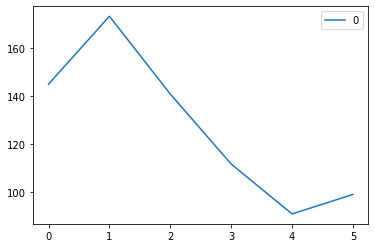

In [43]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [76]:
# ---------------------- MAIN CODE --------------------------

import pandas as pd
df = pd.read_csv('25_oct_7am_static_knn.csv')
df.head()

from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3,random_state = 1)

x_train = train.drop('pm', axis=1)
y_train = train['pm']

x_test = test.drop('pm', axis = 1)
y_test = test['pm']

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6]}

knn = neighbors.KNeighborsRegressor()
#leave one out cross validation
model = GridSearchCV(knn, params, cv=len(x_train),scoring = "neg_root_mean_squared_error")
model.fit(x_train,y_train)
model.best_params_


{'n_neighbors': 5}

In [77]:

best_k = model.best_params_['n_neighbors']
pred=model.predict(x_test) #make prediction on test set
print(y_test)
print(pred)
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
rmse_val.append(error) #store rmse values
print('RMSE value for k= ' , best_k , 'is:', error)

24    207.00
17     98.60
19    278.00
20    198.46
14    271.00
3     196.45
22    160.32
10    118.42
21    284.00
Name: pm, dtype: float64
[219.094 225.258 307.802 233.964 343.238 219.4   298.164 223.4   340.438]
RMSE value for k=  5 is: 79.78391284797539


In [113]:
## Entire data


bus_df = pd.read_csv('2020-10-25_all.csv',parse_dates = ["dateTime"])
# bus_df.head()

,Unnamed: 0,dateTime,deviceId,uid,pressure,temperature,humidity,lat,long,pm1_0,pm2_5,pm10
0,0,2020-10-25 00:00:00+05:30,0000000029c36345,73d3dc0b-65bf-4a22-be54-f2f990c7973f,986.835312,30.24,41.990234,28.579313,77.231171,127.0,203.0,216.0
1,1,2020-10-25 00:00:02+05:30,000000008f525c6e,e4c4f680-84f3-4d9a-bf87-118e708e7b31,883.380000,135.05,100.000000,28.579489,77.232651,107.0,167.0,187.0
2,2,2020-10-25 00:00:03+05:30,0000000029c36345,59727130-30df-4881-bcf0-9e659e8b3e88,986.833281,30.24,41.966797,28.579317,77.231171,125.0,199.0,212.0
3,3,2020-10-25 00:00:11+05:30,000000008f525c6e,4244fe8f-b14a-45f0-83da-203cad2e4815,985.003359,31.05,41.876953,28.579489,77.232658,107.0,171.0,191.0
4,4,2020-10-25 00:00:11+05:30,0000000029c36345,25a64404-f781-4607-88d8-8b57ab640665,986.830312,30.25,41.956055,28.579317,77.231178,123.0,202.0,213.0


In [126]:
# bus_df.iloc[0]['dateTime']


In [142]:
# get target hour bucket
for i in range(24):
    hour_bucket = bus_df.loc[(bus_df.dateTime.apply(lambda x: x.hour) == i), ['lat','long','pm2_5']]
#     print(len(hour_bucket))
hour_bucket = bus_df.loc[(bus_df.dateTime.apply(lambda x: x.hour) == 7), ['lat','long','pm2_5']]
    

In [138]:

from sklearn.model_selection import train_test_split
train , test = train_test_split(hour_bucket, test_size = 0.3,random_state = 1)

x_train = train.drop('pm2_5', axis=1)
y_train = train['pm2_5']

x_test = test.drop('pm2_5', axis = 1)
y_test = test['pm2_5']

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6]}

knn = neighbors.KNeighborsRegressor()
#leave one out cross validation
cv_param = 0
if len(x_train) < 50:
    cv_param = len(x_train)   #leave one out
else:
    cv_param= 5
print('cv = ',cv_param)
model = GridSearchCV(knn, params, cv=cv_param,scoring = "neg_root_mean_squared_error")
model.fit(x_train,y_train)
model.best_params_


cv =  5


{'n_neighbors': 5}

In [139]:
best_k = model.best_params_['n_neighbors']
pred=model.predict(x_test) #make prediction on test set
print(y_test)
print(pred)
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
rmse_val.append(error) #store rmse values
print('RMSE value for k= ' , best_k , 'is:', error)

20013    396.0
22034    314.0
20612    218.0
23076    321.0
20132    250.0
         ...  
20663    231.0
20005    214.0
21321    221.0
22033    249.0
21644    290.0
Name: pm2_5, Length: 1366, dtype: float64
[372.2 304.6 222.4 ... 220.  243.  283.6]
RMSE value for k=  5 is: 20.740271582121252
